Javier Arturo Rozo Alzate - jarozoa@eafit.edu.co  
Johan Steward Rios Naranjo - jriosna1@eafit.edu.co    
Liceth Cristina Mosquera Galvis - lcmosquerg@eafit.edu.co  
Juan Mauricio Cuscagua Lopez - jcuscagu@eafit.edu.co  
Juan Diego Estrada Perez - jestra15@eafit.edu.co

Programa: Aprendizaje Automático
Docente: Olga Lucia Quintero - oquinte1@eafit.edu.co  
05 de noviembre de 2019<br>

Basado en: https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_cmeans.html

In [1]:
# Import libraries
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
import pandas as pd

# Data preparation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

# Utility 
from sklearn.metrics import silhouette_score

# Algorithms
from sklearn.decomposition import PCA

# Codiging - no warnings
import warnings
warnings.filterwarnings("ignore")

## Datos de PI

Aquí evaluaremos los datos de PI y construiremos el mejor modelo de clusterización, segun el algoritmo de Fuzzy C-Means

In [2]:
## Carga de los datos
d1 = pd.read_csv("../data/DataPI.csv")
df1= d1.drop(['Class',"Date"], axis=1)

#Eliminando falta de información tanto en filas como columnas se supone que no es necesario

X1 = df1
y1 = d1.iloc[:,2]

# Visualización
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']


In [3]:
x_train, x_validation, y_train, y_validation = train_test_split(X1, y1, test_size=0.3,random_state=109) # 60% training and 40% test

In [4]:
#Estandarizar
sc1=StandardScaler() 
sc1.fit(x_train)
X1_std_tr=sc1.transform(x_train)
X1_std_ts=sc1.transform(x_validation)

In [5]:
alldata = np.vstack(np.transpose(X1_std_tr))

fpcs = []
for ncenters in range(1, 10):
    cntr_model, u_model, u0_model, d_model, jm_model, p_model, fpc_model = fuzz.cluster.cmeans(alldata, 
    ncenters, 2, error=0.005, maxiter=1000, init=None)


    # Store fpc values for later
    fpcs.append(fpc_model)

Text(0, 0.5, 'Fuzzy partition coefficient')

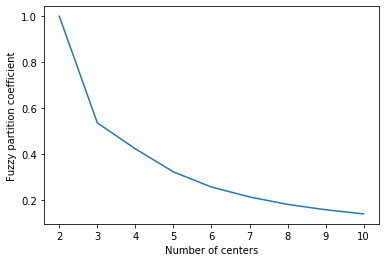

In [6]:
fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:11], fpcs)
ax2.set_xlabel("Number of centers")
ax2.set_ylabel("Fuzzy partition coefficient")

Aquí observamos como el número de clusters óptimo para el modelo sería de 2.

## Creemos nuestro modelo con 2 clusters

In [7]:
cntr_model_pi, u_model_pi, u0_model_pi, d_model_pi, jm_model_pi, p_model_pi, fpc_model_pi = fuzz.cluster.cmeans(
    alldata, 2, 2, error=0.005, maxiter=1000, init=None)

cluster_membership_pi = np.argmax(u_model_pi, axis = 0)

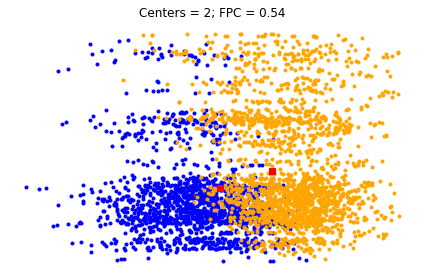

In [8]:
fig1, ax = plt.subplots()

for j in range(2):
    ax.plot(X1_std_tr[:,42][cluster_membership_pi == j],
            X1_std_tr[:,15][cluster_membership_pi == j], '.', color=colors[j])

# Mark the center of each fuzzy cluster
for pt in cntr_model_pi:
    ax.plot(pt[42], pt[15], 'rs')

ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(2, fpc_model_pi))
ax.axis('off')

fig1.tight_layout()

## Vamos a predecir en que cluster deben estar los datos de validación

In [9]:
validation = np.vstack(np.transpose(X1_std_ts))


In [10]:
u, u0, d, jm, p, fpc = fuzz.cluster.cmeans_predict(
    validation, cntr_model_pi, 2, error=0.005, maxiter=1000)

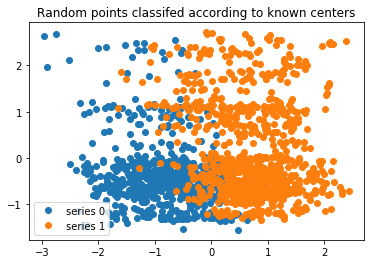

In [11]:
cluster_membership = np.argmax(u, axis=0)  # Hardening for visualization

fig3, ax3 = plt.subplots()
ax3.set_title('Random points classifed according to known centers')
for j in range(2):
    ax3.plot(X1_std_ts[:,42][cluster_membership == j],
             X1_std_ts[:,15][cluster_membership == j], 'o',
             label='series ' + str(j))
ax3.legend()


## Calculando silhoutte_score

Este metodo permite interpretar y validar la consistencia de los datos en los clusters.

### silhouette_score - training

In [12]:
silhouette_score(X1_std_tr, cluster_membership_pi)

0.20660054136030873

### silhouette_score - validation

In [13]:
silhouette_score(X1_std_ts, cluster_membership)

0.2201308090286643

# Bajas Dimensiones PCA

In [14]:
n_components = 2
whiten = False
random_state = None

pca = PCA(n_components=n_components, whiten=whiten, random_state=random_state)
X_PCA_tr = pca.fit_transform(X1_std_tr)
X_PCA_tr = pd.DataFrame(data=X_PCA_tr)

X_PCA_ts = pca.transform(X1_std_ts)
X_PCA_ts = pd.DataFrame(data=X_PCA_ts)

In [15]:
np.asarray(X_PCA_tr)[:,0]

array([ 0.63297424,  6.25601523, -4.27102655, ..., -0.6857267 ,
       -3.44013869,  2.2169386 ])

In [16]:
alldata_pca = np.vstack((np.asarray(X_PCA_tr)[:,0],np.asarray(X_PCA_tr)[:,1]))

fpcs = []
for ncenters in range(1, 10):
    cntr_model, u_model, u0_model, d_model, jm_model, p_model, fpc_model = fuzz.cluster.cmeans(alldata_pca, 
    ncenters, 2, error=0.005, maxiter=1000, init=None)


    # Store fpc values for later
    fpcs.append(fpc_model)

Text(0, 0.5, 'Fuzzy partition coefficient')

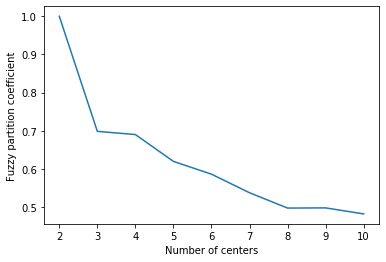

In [17]:
fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:11], fpcs)
ax2.set_xlabel("Number of centers")
ax2.set_ylabel("Fuzzy partition coefficient")

Aquí observamos como el número de clusters óptimo para el modelo sería de 3.

## Creemos nuestro modelo con 2 clusters

In [18]:
cntr_model_pca, u_model_pca, u0_model_pca, d_model_pca, jm_model_pca, p_model_pca, fpc_model_pca = fuzz.cluster.cmeans(
    alldata_pca, 2, 2, error=0.005, maxiter=1000, init=None)

cluster_membership_pca = np.argmax(u_model_pca, axis = 0)

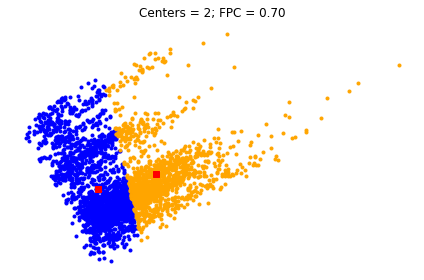

In [19]:
fig1, ax = plt.subplots()

for j in range(2):
    ax.plot(np.asarray(X_PCA_tr)[:,0][cluster_membership_pca == j],
            np.asarray(X_PCA_tr)[:,1][cluster_membership_pca == j], '.', color=colors[j])

# Mark the center of each fuzzy cluster
for pt in cntr_model_pca:
    ax.plot(pt[0], pt[1], 'rs')

ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(2, fpc_model_pca))
ax.axis('off')

fig1.tight_layout()

## Vamos a predecir en que cluster deben estar los datos de validación

In [20]:
validation_pca = np.vstack((np.asarray(X_PCA_ts)[:,0],np.asarray(X_PCA_ts)[:,1]))


In [21]:
u, u0, d, jm, p, fpc = fuzz.cluster.cmeans_predict(
    validation_pca, cntr_model_pca, 2, error=0.005, maxiter=1000)

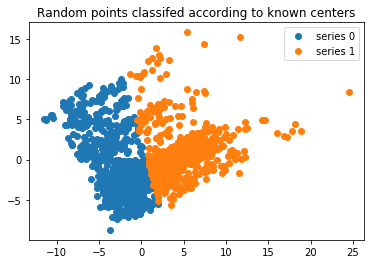

In [22]:
cluster_membership_pca_val = np.argmax(u, axis=0)  # Hardening for visualization

fig3, ax3 = plt.subplots()
ax3.set_title('Random points classifed according to known centers')
for j in range(2):
    ax3.plot(np.asarray(X_PCA_ts)[:,0][cluster_membership_pca_val == j],
             np.asarray(X_PCA_ts)[:,1][cluster_membership_pca_val == j], 'o',
             label='series ' + str(j))
ax3.legend()


## Calculando silhoutte_score

Este metodo permite interpretar y validar la consistencia de los datos en los clusters.

### silhouette_score - training

In [23]:
silhouette_score(X_PCA_tr, cluster_membership_pca)

0.36569644474442037

### silhouette_score - validation

In [24]:
silhouette_score(X_PCA_ts, cluster_membership_pca_val)

0.38987059917830785